<a href="https://colab.research.google.com/github/ShrieVarshini2004/Deep-Learning/blob/main/backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 9999, Average error: 0.05193
Epoch: 19999, Average error: 0.03040
Epoch: 29999, Average error: 0.02335
Epoch: 39999, Average error: 0.01960
Epoch: 49999, Average error: 0.01719
Epoch: 59999, Average error: 0.01548
Epoch: 69999, Average error: 0.01419
Epoch: 79999, Average error: 0.01316
Epoch: 89999, Average error: 0.01233
Epoch: 99999, Average error: 0.01164
Epoch: 109999, Average error: 0.01105
Epoch: 119999, Average error: 0.01054
Epoch: 129999, Average error: 0.01009
Epoch: 139999, Average error: 0.00970
Epoch: 149999, Average error: 0.00934
Epoch: 159999, Average error: 0.00903
Epoch: 169999, Average error: 0.00874
Epoch: 179999, Average error: 0.00848
Final output after training: [[0.0078047  0.99190885 0.99190472 0.00991377]]
Ground truth [0 1 1 0]
Error after training: [[-0.00780472  0.00809117  0.0080953  -0.0099138 ]]
Average error: 0.00848


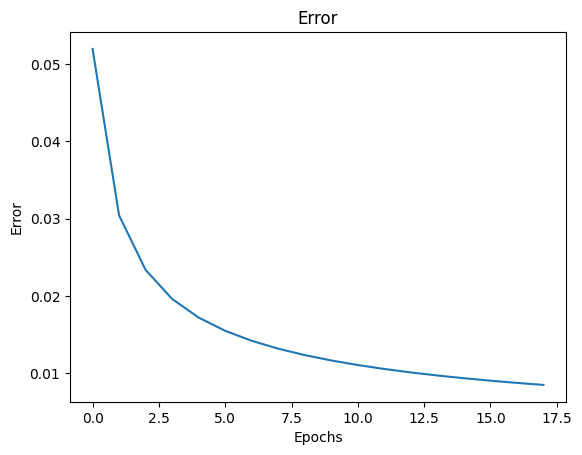

Epoch: 9999, Average error: 0.27149
Epoch: 19999, Average error: 0.01814
Epoch: 29999, Average error: 0.01263
Epoch: 39999, Average error: 0.01027
Epoch: 49999, Average error: 0.00889
Epoch: 59999, Average error: 0.00795
Epoch: 69999, Average error: 0.00726
Epoch: 79999, Average error: 0.00673
Epoch: 89999, Average error: 0.00630
Epoch: 99999, Average error: 0.00595
Epoch: 109999, Average error: 0.00565
Epoch: 119999, Average error: 0.00539
Epoch: 129999, Average error: 0.00516
Epoch: 139999, Average error: 0.00497
Epoch: 149999, Average error: 0.00479
Epoch: 159999, Average error: 0.00463
Epoch: 169999, Average error: 0.00449
Epoch: 179999, Average error: 0.00436

Final output after training: [[0.00540634 0.00187797 0.00187777 0.99173393]]
Ground truth [0 0 0 1]
Error after training: [[-0.00540635 -0.00187797 -0.00187777  0.0082661 ]]
Average error: 0.00436


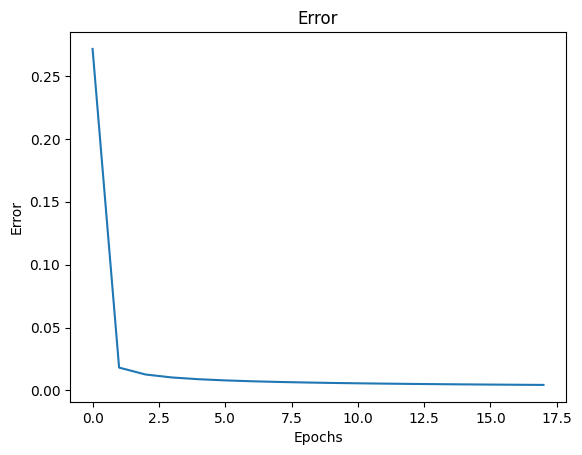


Final output after training: [[0.00540634 0.00187797 0.00187777 0.99173393]]
Ground truth [0 0 0 1]
Error after training: [[-0.00540635 -0.00187797 -0.00187777  0.0082661 ]]
Average error: 0.00436


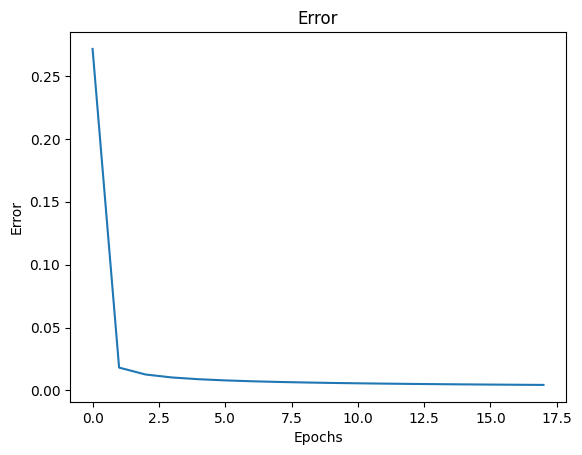

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR
# Network parameters
inputSize = 2     # Number of input neurons (x1, x2)
hiddenSize = 2    # Number of hidden neurons
outputSize = 1    # Number of output neurons
lr = 0.1          # Learning rate
epochs = 180000   # Number of training epochs
# Initialize weights and biases randomly within the range [-1, 1]
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
b1 = np.random.rand(hiddenSize, 1) * 2 - 1         # Bias for hidden layer
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  # Weights from hidden to output layer
b2 = np.random.rand(outputSize, 1) * 2 - 1         # Bias for output layer
# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))
    # Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

lr = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()